In [1]:
# -*- coding: utf-8 -*
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

from sklearn import svm  # svm导入
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ChangedBehaviorWarning

# 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

warnings.filterwarnings('ignore', category=ChangedBehaviorWarning)

In [2]:
## 读取数据
# '电量趋势下降指标', '告警类指标', '是否漏电'
path = 'Electric_leakage.csv'  # 数据文件路径
data = pd.read_csv(path,names=[0,1,2])
x, y = data[list(range(2))], data[2]
#把文本数据进行编码，比如a b c编码为 0 1 2; 可以通过pd.Categorical(y).categories获取index对应的原始值
y = pd.Categorical(y).codes
x = x[[0, 1]] # 获取第一列和第二列

In [3]:
# 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.95)
# 数据SVM分类器构建
clf = svm.SVC(C=1,kernel='rbf',gamma=0.1)
#gamma值越大，训练集的拟合就越好，但是会造成过拟合，导致测试集拟合变差
#gamma值越小，模型的泛化能力越好，训练集和测试集的拟合相近，但是会导致训练集出现欠拟合问题，
#从而，准确率变低，导致测试集准确率也变低。

# 模型训练
clf.fit(x_train, y_train)

## 计算模型的准确率/精度
print (clf.score(x_train, y_train))
print ('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print (clf.score(x_test, y_test))
print ('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

0.8985507246376812
训练集准确率： 0.8985507246376812
0.8
测试集准确率： 0.8


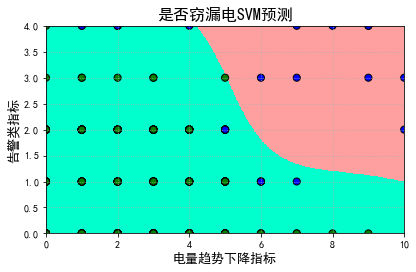

In [4]:
# 画图
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
# print(x.max())
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

grid_hat = clf.predict(grid_show)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

plt.figure(facecolor='w')
## 区域图
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
## 所有样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电SVM预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()

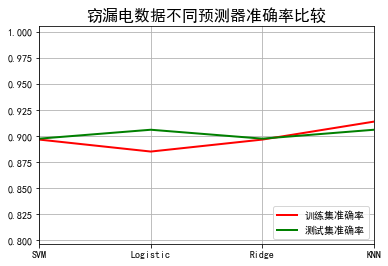

In [5]:
#不同分类器准确率比较
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
## 读取数据
# '电量趋势下降指标', '告警类指标', '是否漏电'
path = 'test.csv'  # 数据文件路径
data = pd.read_csv(path,names=[0,1,2])
x, y = data[list(range(2))], data[2]
y = pd.Categorical(y).codes #把文本数据进行编码，比如a b c编码为 0 1 2; 可以通过pd.Categorical(y).categories获取index对应的原始值
x = x[[0, 1]] # 获取第一列和第二列
 
## 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)
  
#  数据SVM预测器构建
svm = SVC(C=1, kernel='linear')
## Linear预测器构建
lr = LogisticRegression()
rc = RidgeClassifier()#ridge是为了解决特征大于样本，而导致分类效果较差的情况，而提出的
#svm有一个重要的瓶颈——当特征数大于样本数的时候，效果变差
knn = KNeighborsClassifier()
  
## 模型训练
svm.fit(x_train, y_train)
lr.fit(x_train, y_train)
rc.fit(x_train, y_train)
knn.fit(x_train, y_train)
  
## 效果评估
svm_score1 = accuracy_score(y_train, svm.predict(x_train))
svm_score2 = accuracy_score(y_test, svm.predict(x_test))

lr_score1 = accuracy_score(y_train, lr.predict(x_train))
lr_score2 = accuracy_score(y_test, lr.predict(x_test))

rc_score1 = accuracy_score(y_train, rc.predict(x_train))
rc_score2 = accuracy_score(y_test, rc.predict(x_test))

knn_score1 = accuracy_score(y_train, knn.predict(x_train))
knn_score2 = accuracy_score(y_test, knn.predict(x_test))

## 画图
x_tmp = [0,1,2,3]
y_score1 = [svm_score1, lr_score1, rc_score1, knn_score1]
y_score2 = [svm_score2, lr_score2, rc_score2, knn_score2]

plt.figure(facecolor='w')
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'训练集准确率')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'测试集准确率')
plt.xlim(0, 3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower right')
plt.title(u'窃漏电数据不同预测器准确率比较', fontsize=16)
plt.xticks(x_tmp, [u'SVM', u'Logistic', u'Ridge', u'KNN'], rotation=0)
plt.grid(b=True)
plt.show()


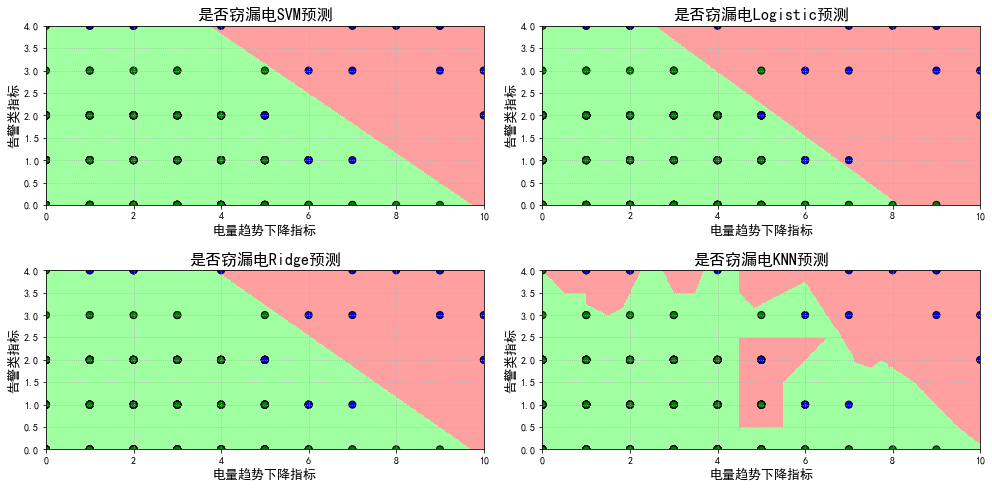

In [6]:
### 画图比较
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

## 获取各个不同算法的测试值
svm_grid_hat = svm.predict(grid_show)
svm_grid_hat = svm_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

lr_grid_hat = lr.predict(grid_show)
lr_grid_hat = lr_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

rc_grid_hat = rc.predict(grid_show)
rc_grid_hat = rc_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

knn_grid_hat = knn.predict(grid_show)
knn_grid_hat = knn_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

## 画图
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))

### svm 区域图
plt.subplot(221)
plt.pcolormesh(x1, x2, svm_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电SVM预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(222)
## 区域图
plt.pcolormesh(x1, x2, lr_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电Logistic预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(223)
## 区域图
plt.pcolormesh(x1, x2, rc_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电Ridge预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(224)
## 区域图
plt.pcolormesh(x1, x2, knn_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电KNN预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()

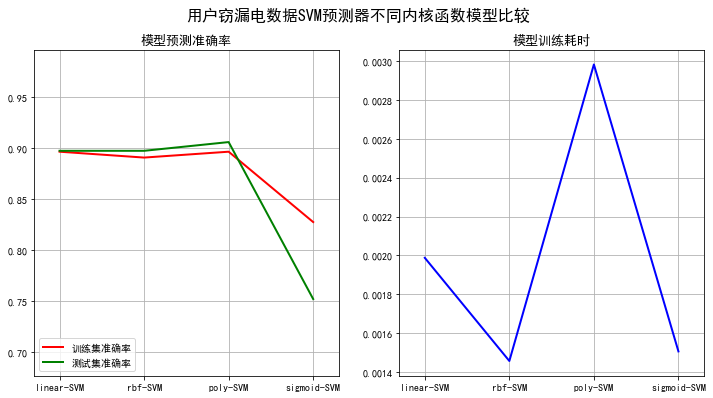

In [8]:
#不同SVM核函数效果比较
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
## 读取数据
# '电量趋势下降指标', '告警类指标', '是否漏电'
path = 'test.csv'  # 数据文件路径
data = pd.read_csv(path,names=[0,1,2])
x, y = data[list(range(2))], data[2]
y = pd.Categorical(y).codes #把文本数据进行编码，比如a b c编码为 0 1 2; 可以通过pd.Categorical(y).categories获取index对应的原始值
x = x[[0, 1]] # 获取第一列和第二列
 
## 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)

## 数据SVM预测器构建
svm1 = SVC(C=1, kernel='linear')
svm2 = SVC(C=1, kernel='rbf')
svm3 = SVC(C=1, kernel='poly')
svm4 = SVC(C=1, kernel='sigmoid')

## 模型训练
t0=time.time()
svm1.fit(x_train, y_train)
t1=time.time()
svm2.fit(x_train, y_train)
t2=time.time()
svm3.fit(x_train, y_train)
t3=time.time()
svm4.fit(x_train, y_train)
t4=time.time()

### 效果评估
svm1_score1 = accuracy_score(y_train, svm1.predict(x_train))
svm1_score2 = accuracy_score(y_test, svm1.predict(x_test))

svm2_score1 = accuracy_score(y_train, svm2.predict(x_train))
svm2_score2 = accuracy_score(y_test, svm2.predict(x_test))

svm3_score1 = accuracy_score(y_train, svm3.predict(x_train))
svm3_score2 = accuracy_score(y_test, svm3.predict(x_test))

svm4_score1 = accuracy_score(y_train, svm4.predict(x_train))
svm4_score2 = accuracy_score(y_test, svm4.predict(x_test))

## 画图
x_tmp = [0,1,2,3]
t_score = [t1 - t0, t2-t1, t3-t2, t4-t3]
y_score1 = [svm1_score1, svm2_score1, svm3_score1, svm4_score1]
y_score2 = [svm1_score2, svm2_score2, svm3_score2, svm4_score2]

plt.figure(facecolor='w', figsize=(12,6))

plt.subplot(121)
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'训练集准确率')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'测试集准确率')
plt.xlim(-0.3, 3.3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower left')
plt.title(u'模型预测准确率', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.grid(b=True)

plt.subplot(122)
plt.plot(x_tmp, t_score, 'b-', lw=2, label=u'模型训练时间')
plt.title(u'模型训练耗时', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.xlim(-0.3, 3.3)
plt.grid(b=True)
plt.suptitle(u'用户窃漏电数据SVM预测器不同内核函数模型比较', fontsize=16)

plt.show()

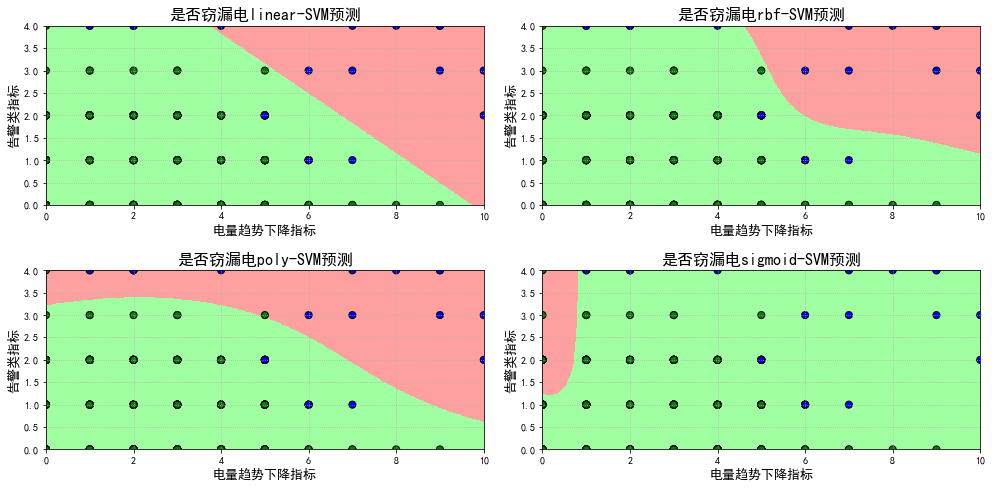

In [9]:
### 预测结果画图
### 画图比较
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

## 获取各个不同算法的测试值
svm1_grid_hat = svm1.predict(grid_show)
svm1_grid_hat = svm1_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm2_grid_hat = svm2.predict(grid_show)
svm2_grid_hat = svm2_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm3_grid_hat = svm3.predict(grid_show)
svm3_grid_hat = svm3_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm4_grid_hat = svm4.predict(grid_show)
svm4_grid_hat = svm4_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

## 画图
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))

### svm
plt.subplot(221)
## 区域图
plt.pcolormesh(x1, x2, svm1_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电linear-SVM预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(222)
## 区域图
plt.pcolormesh(x1, x2, svm2_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电rbf-SVM预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(223)
## 区域图
plt.pcolormesh(x1, x2, svm3_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电poly-SVM预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(224)
## 区域图
plt.pcolormesh(x1, x2, svm4_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel('电量趋势下降指标', fontsize=13)
plt.ylabel('告警类指标', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'是否窃漏电sigmoid-SVM预测', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()